# Introduction

In this tutorial we will be attempting to predict the price of an AirBnB listing given some very simply information on the listing.

We will use linear regression to make our predictions and along the way we will learn the importance of feature engineering and data regularization. This tutorial will give a hand on look at how you can use domain knowledge to improve your features and make more accurate predictions.

Let's start by importing all the packages we will need. A brief rundown on the packages if you are not familiar:

 -numpy and pandas will allow us to easily manipulate the data
 
 -matplotlib and seaborn will give us powerful tools to quickly generate visualizations that will help us quickly learn about the distributions of the data
 
 -scikit-learn will provide us with the ML tools we need to generate and evaluate our predictions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
%matplotlib inline

# The Data

The dataset we are using comes from AirBnB.

The data can be downloaded here: http://insideairbnb.com/get-the-data.html

Find the dataset for New York City and download the 'listings.csv.gz' file and decompress it. Then provide the path to the uncompressed csv file below.

In [2]:
PATH_TO_LISTING_DATA = "data/listings.csv"

We will use pandas to load the data straight from the CSV. After the data has been loaded into a data frame, let's start by taking a look at the information we have available.

In [3]:
original_df = pd.read_csv(open(PATH_TO_LISTING_DATA), index_col="id", low_memory=False)
print(list(original_df))

['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', 'securi

There is a lot there and it looks like it won't all be useful to us. Let's get drop as many columns as we can in order to make the dataset a little more manageable to work with. There are two types of categories of data we will get rid of: the metadata generated at scrape time (listing_url, scrape_id, etc.) and those that AirBnB maintains but does will not be useful in predicting the price (host_thumbnail_url, etc.) A list of these useless columns is given below.

In [4]:
to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'access', 'interaction', 'house_rules', 'thumbnail_url',
           'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
           'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate',
           'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count',
           'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
           'country_code', 'country', 'is_location_exact', 'weekly_price', 'monthly_price', 'security_deposit',
           'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated',
           'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365',
           'calendar_last_scraped', 'first_review', 'last_review', 'requires_license', 'license', 'jurisdiction_names',
           'instant_bookable', 'is_business_travel_ready', 'cancellation_policy', 'require_guest_profile_picture',
           'require_guest_phone_verification', 'calculated_host_listings_count', 'reviews_per_month']
small_df = original_df.drop(to_drop, axis=1)


Now that the dataset is a bit smaller, let's take a look at what we're working with.

In [5]:
small_df.head()

,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,street,neighbourhood,...,square_feet,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
id,,,,,,,,,,,,,,,,,,,,,
2515,Stay at Chez Chic budget room #1,Step into our artistic spacious apartment and ...,-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUE...,Step into our artistic spacious apartment and ...,none,NaN,Please no cooking at night but you can warm up...,Subway 2.3.B.C. at 110th street around the cor...,"New York, NY, United States",Harlem,...,NaN,$59.00,164,92.0,9.0,9.0,10.0,9.0,9.0,9.0
2539,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,If this room is unavailable on your desired da...,Very close to F and G trains and Express bus i...,"Brooklyn , NY, United States",Kensington,...,NaN,$39.00,7,97.0,10.0,10.0,10.0,10.0,10.0,10.0
2595,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ft²), immaculate and nicely fu...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,NaN,Apartment is located on 37th Street between 5t...,"New York, NY, United States",Midtown,...,NaN,$225.00,29,97.0,9.0,9.0,9.0,10.0,10.0,9.0
3330,++ Brooklyn Penthouse Guestroom ++,"This is a spacious, clean, furnished master be...","Room Features: - clean, hardwood floors - 2 la...","This is a spacious, clean, furnished master be...",none,Location is GREAT!! Right off the L train in t...,We would very much appreciate it if you give u...,You will be STEPS AWAY FROM THE L TRAIN. Hop o...,"Brooklyn, NY, United States",Williamsburg,...,NaN,$70.00,27,97.0,10.0,10.0,10.0,10.0,10.0,10.0
3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,NaN,"New York, NY, United States",Harlem,...,NaN,$150.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It looks like there are too many columns and they aren't all being displayed. We can adjust the number of columns pandas shows us by default so that we can get a sense of our whole dataset.

In [6]:
pd.set_option('display.max_columns', 100)
small_df.head()

,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2515,Stay at Chez Chic budget room #1,Step into our artistic spacious apartment and ...,-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUE...,Step into our artistic spacious apartment and ...,none,NaN,Please no cooking at night but you can warm up...,Subway 2.3.B.C. at 110th street around the cor...,"New York, NY, United States",Harlem,Harlem,Manhattan,New York,NY,10026,New York,"New York, NY",40.799205,-73.953676,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",NaN,$59.00,164,92.0,9.0,9.0,10.0,9.0,9.0,9.0
2539,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,If this room is unavailable on your desired da...,Very close to F and G trains and Express bus i...,"Brooklyn , NY, United States",Kensington,Kensington,Brooklyn,Brooklyn,NY,11218,New York,"Brooklyn , NY",40.647486,-73.972370,Apartment,Private room,4,1.0,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$39.00,7,97.0,10.0,10.0,10.0,10.0,10.0,10.0
2595,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ft²), immaculate and nicely fu...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,NaN,Apartment is located on 37th Street between 5t...,"New York, NY, United States",Midtown,Midtown,Manhattan,New York,NY,10018,New York,"New York, NY",40.753621,-73.983774,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Indoor fi...",NaN,$225.00,29,97.0,9.0,9.0,9.0,10.0,10.0,9.0
3330,++ Brooklyn Penthouse Guestroom ++,"This is a spacious, clean, furnished master be...","Room Features: - clean, hardwood floors - 2 la...","This is a spacious, clean, furnished master be...",none,Location is GREAT!! Right off the L train in t...,We would very much appreciate it if you give u...,You will be STEPS AWAY FROM THE L TRAIN. Hop o...,"Brooklyn, NY, United States",Williamsburg,Williamsburg,Brooklyn,Brooklyn,NY,11206,New York,"Brooklyn, NY",40.708558,-73.942362,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Wheelchair accessible"",Kitc...",NaN,$70.00,27,97.0,10.0,10.0,10.0,10.0,10.0,10.0
3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,NaN,"New York, NY, United States",Harlem,Harlem,Manhattan,New York,NY,10027,New York,"New York, NY",40.809018,-73.941902,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",NaN,$150.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now that we can see everything let's look at the price column. Since it is the column we want to predict it will be pretty important to us. Right now it is stored in the dataframe as a string. Our model is going to require it to be a float, so we will have to convert it ourselves. Below is a function that will take in a string as input, remove unwanted punctuation ('$', ',') and return a float.

In [7]:
def xform_price(x):
    """Returns a float from a string formatted as currency."""
    return float(x.replace('$', '').replace(',', ''))

xform_price('$9,999.99')

9999.99

Let's apply the transformation to the whole dataset.

In [8]:
small_df['price'] = small_df['price'].apply(xform_price)
small_df.head()

,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2515,Stay at Chez Chic budget room #1,Step into our artistic spacious apartment and ...,-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUE...,Step into our artistic spacious apartment and ...,none,NaN,Please no cooking at night but you can warm up...,Subway 2.3.B.C. at 110th street around the cor...,"New York, NY, United States",Harlem,Harlem,Manhattan,New York,NY,10026,New York,"New York, NY",40.799205,-73.953676,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",NaN,59.0,164,92.0,9.0,9.0,10.0,9.0,9.0,9.0
2539,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,If this room is unavailable on your desired da...,Very close to F and G trains and Express bus i...,"Brooklyn , NY, United States",Kensington,Kensington,Brooklyn,Brooklyn,NY,11218,New York,"Brooklyn , NY",40.647486,-73.972370,Apartment,Private room,4,1.0,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,39.0,7,97.0,10.0,10.0,10.0,10.0,10.0,10.0
2595,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ft²), immaculate and nicely fu...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,NaN,Apartment is located on 37th Street between 5t...,"New York, NY, United States",Midtown,Midtown,Manhattan,New York,NY,10018,New York,"New York, NY",40.753621,-73.983774,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Indoor fi...",NaN,225.0,29,97.0,9.0,9.0,9.0,10.0,10.0,9.0
3330,++ Brooklyn Penthouse Guestroom ++,"This is a spacious, clean, furnished master be...","Room Features: - clean, hardwood floors - 2 la...","This is a spacious, clean, furnished master be...",none,Location is GREAT!! Right off the L train in t...,We would very much appreciate it if you give u...,You will be STEPS AWAY FROM THE L TRAIN. Hop o...,"Brooklyn, NY, United States",Williamsburg,Williamsburg,Brooklyn,Brooklyn,NY,11206,New York,"Brooklyn, NY",40.708558,-73.942362,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Wheelchair accessible"",Kitc...",NaN,70.0,27,97.0,10.0,10.0,10.0,10.0,10.0,10.0
3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,NaN,"New York, NY, United States",Harlem,Harlem,Manhattan,New York,NY,10027,New York,"New York, NY",40.809018,-73.941902,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",NaN,150.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# The Naive Approach

Our first attempt at making the predictions will be extremeley naive, but it will demonstrate the power of linear regression and the versatility of scikit-learn for rapid prototyping.

Because we want to use linear regression, all our inputs need to be numeric. Thus let's begin by simply taking all the numeric inputs we have available and training a linear regression model using those features.

Below is a list of every numeric feature in the dataset. We apply some cleaning on them to eliminate rows with any missing or dirty data, but other than that there is no feature transformation whatsoever.

In [9]:
numeric_cols = ['zipcode', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
                'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

def clean_numeric(df):
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df = df.dropna(subset=[col])
    return df

Let's apply the cleaning function to the dataset and while we're at it let's eliminate any row that does not have at least two reviews. By limiting the dataset to listings we know have been rented we can be confident that the listings are competitevly priced at market value and thus should priced in a somewhat predictable way.

In [10]:
clean_df = clean_numeric(small_df)
clean_df = clean_df[clean_df['number_of_reviews'] > 2]

/Users/nikogekakis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Now that the data is clean, let's split it into a test and training set. We can use the split method available from scikit-learn that we imported at the start. For this tutorial we will be using a 70-30 split between the training and test set. Because we do not have hyperparameters we will not be using a validation set.

In [11]:
train_df, test_df = train_test_split(clean_df, test_size=0.3)
print(len(train_df), "rows in training data.")
print(len(test_df), "rows in test data.")

19625 rows in training data.
8412 rows in test data.


Let's create a small helper function that will allow us to easily access only the features we are interested in for our first model. We will take advantage of the list of numeric features we defined above.

In [12]:
def get_numerical(df):
    return df[numeric_cols]

get_numerical(train_df).head()

,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
id,,,,,,,,,,,,,,,
20836787,11102.0,40.776909,-73.926617,2,1.0,0.0,1.0,3,80.0,8.0,6.0,9.0,7.0,10.0,7.0
21197268,11385.0,40.704042,-73.858318,2,1.0,1.0,1.0,4,100.0,10.0,10.0,10.0,10.0,10.0,10.0
7858468,10019.0,40.764245,-73.991621,1,1.0,1.0,1.0,203,98.0,10.0,10.0,10.0,10.0,10.0,10.0
13866269,11216.0,40.686371,-73.944775,2,1.0,1.0,1.0,6,95.0,10.0,10.0,10.0,10.0,9.0,10.0
15509545,10002.0,40.718060,-73.993512,5,1.0,2.0,4.0,7,100.0,10.0,9.0,10.0,10.0,9.0,10.0


We are now ready to train our first model. Training a linear regression model with scikit-learn is easy, simply initialize a model using the LinearRegression() call and then train it with the fit() method. Here we pass in our numeric columns as input and the corresponding price for each listing as the target.

In [13]:
base_model = linear_model.LinearRegression()
base_model.fit(get_numerical(train_df), train_df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Making the predictions is just as easy, simply call the predict() method on the model, make sure to pass in the same set of features from the test set as used to train. We can use the helper function we defined above to easily pass in these features.

In [14]:
base_predictions = base_model.predict(get_numerical(test_df))
print(base_predictions[:10])

[ 132.05224228  121.45187842  143.02307739  110.43287067  143.59079896
  100.84517755  221.64115048  177.7777146   107.35545828  211.27908261]


In [15]:
test_df['price'].head(10)

id
11091309     95.0
14824492    110.0
2255501      67.0
11991426    190.0
6505927     118.0
50726       165.0
21785021    149.0
14772799    210.0
16480273    100.0
13208065    299.0
Name: price, dtype: float64

A quick comparison between actual and expected output shows that the predictions don't get that close but they do seem to seem to trend up and down properly. We can get a real measure of the model using scikit-learn's mean_absolute_error function. 

In [16]:
print(mean_absolute_error(base_predictions, test_df['price']))

52.8575363351


Not bad! Linear regression is pretty powerful even when approached naively. But let's see if we can improve!

# Feature Engineering and Data Normalization

Now let's begin the feature engineering.

We will start by looking at the way price is distributed across all listings.

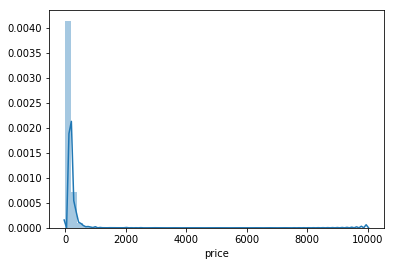

In [17]:
train_df[['neighbourhood_cleansed','price']].head()
sns.distplot(train_df['price'])

This is not a very nice distribution. There are some serious outliers (this is New York real estate afterall!) that could seriously throw off our model. Since this application is not quite safety-critical we would prefer that our model work well for 99% of inputs rather than cover all possible inputs. Let's go ahead and eliminate any listings that are more than $2,000 per night. And while we're at it let's get a measure of the new mean and standard deviation. These will help us perform some normalization.

In [18]:
engineered_df = train_df[train_df['price'] < 1000.01]
avg_price = engineered_df['price'].mean()
std_price = engineered_df['price'].std()
print(avg_price, std_price)

135.42743295019156 106.6216046662865


Now we will normalize the price by subtracting out the mean and dividing by the standard deviation. This makes the new value easier for a linear model to predict.

In [19]:
def normalize_price(price):
    return (price - avg_price) / std_price

normalize_price(120.0)

-0.14469331050191628

In [20]:
def unnormalize_price(normalized_price):
    return (normalized_price * std_price) + avg_price

unnormalize_price(normalize_price(120.0))

120.0

Apply the transformation to the training dataset and look at the new distribution.

/Users/nikogekakis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


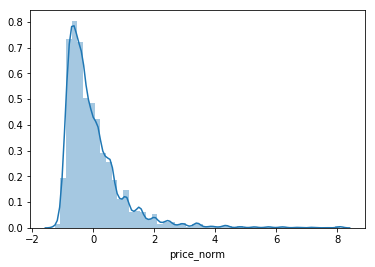

In [21]:
engineered_df['price_norm'] = engineered_df['price'].apply(normalize_price)
sns.distplot(engineered_df['price_norm'])

Any realtor will tell you there are three rules in real estate: location, location, location! We want to capture this information using the neighborhood data but since neighborhood is categorical we have to transform it to a numeric value. Let's get the average price per neighborhood. 

In [22]:
engineered_df.groupby('neighbourhood_cleansed')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_cleansed,,,,,,,,
Allerton,18.0,77.222222,41.207589,35.0,46.00,70.0,88.75,200.0
Arden Heights,2.0,22.000000,2.828427,20.0,21.00,22.0,23.00,24.0
Arrochar,4.0,80.250000,42.952493,25.0,58.00,87.0,109.25,122.0
Arverne,33.0,106.424242,73.103963,0.0,50.00,87.0,150.00,275.0
Astoria,372.0,99.008065,70.102216,27.0,59.00,80.0,112.50,750.0
Bath Beach,5.0,58.000000,18.907670,40.0,45.00,50.0,70.00,85.0
Battery Park City,12.0,190.750000,122.917655,60.0,94.00,164.5,262.50,450.0
Bay Ridge,38.0,81.684211,43.799979,23.0,50.00,72.5,100.00,238.0
Bay Terrace,2.0,186.500000,3.535534,184.0,185.25,186.5,187.75,189.0


In [23]:
engineered_df['price_per_acc'] = engineered_df['price'] / engineered_df['accommodates']
avgs = engineered_df.groupby('neighbourhood_cleansed')['price_per_acc'].mean()
avgs

/Users/nikogekakis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


neighbourhood_cleansed
Allerton               31.835119
Arden Heights          22.000000
Arrochar               28.770833
Arverne                32.735750
Astoria                39.276171
Bath Beach             35.166667
Battery Park City      98.354167
Bay Ridge              32.391667
Bay Terrace            26.642857
Baychester             35.000000
Bayside                24.025904
Bayswater              31.400000
Bedford-Stuyvesant     34.693216
Belle Harbor          112.500000
Bellerose              33.437500
Belmont                31.033333
Bensonhurst            29.037415
Bergen Beach           48.750000
Boerum Hill            56.625561
Borough Park           28.966146
Briarwood              30.275362
Brighton Beach         29.665476
Bronxdale              26.909091
Brooklyn Heights       63.048359
Brownsville            28.205952
Bushwick               34.747943
Cambria Heights        31.354167
Canarsie               24.823251
Carroll Gardens        51.195215
Castleton Corners   

In [24]:
avg_all = (engineered_df['price']/engineered_df['accommodates']).mean()

In [25]:
def get_neighborhood_average(ngh):
    try:
        return avgs[ngh]
    except:
        return avg_all
    
print(get_neighborhood_average('Squirrel Hill'), get_neighborhood_average('Midtown'))

49.59642460562006 72.5599576449


In [26]:
def get_adjusted_price(df):
    df['adjusted_price'] = df['neighbourhood_cleansed'].apply(lambda x: get_neighborhood_average(x)) * df['accommodates']
    return df

In [27]:
engineered_df = get_adjusted_price(engineered_df)
eng_test_df = get_adjusted_price(test_df)

avg_adj_price = engineered_df['adjusted_price'].mean()
std_adj_price = engineered_df['adjusted_price'].std()

def normalize_adj_price(adj_price):
    return (adj_price - avg_adj_price) / std_adj_price

normalize_adj_price(120.0)

/Users/nikogekakis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


-0.25813521049714705

/Users/nikogekakis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/nikogekakis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


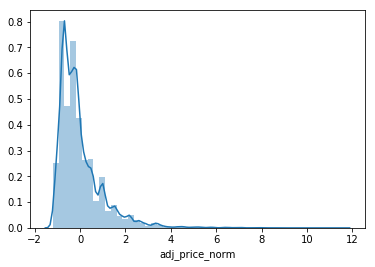

In [28]:
engineered_df['adj_price_norm'] = engineered_df['adjusted_price'].apply(normalize_adj_price)
eng_test_df['adj_price_norm'] = eng_test_df['adjusted_price'].apply(normalize_adj_price)
sns.distplot(engineered_df['adj_price_norm'])

Our final new feature will be another categorical feature. This one is room type. This time we will take a single categorical feature and make three binary features out of it.

In [29]:
set(engineered_df['room_type'])

{'Entire home/apt', 'Private room', 'Shared room'}

In [30]:
def is_entire_helper(rm_type):
    if rm_type == 'Entire home/apt':
        return 1
    else:
        return 0

def add_is_entire(df):
    df['is_entire'] = df['room_type'].apply(is_entire_helper)
    return df
    
def is_private_helper(rm_type):
    if rm_type == 'Private room':
        return 1
    else:
        return 0

def add_is_private(df):
    df['is_private'] = df['room_type'].apply(is_private_helper)
    return df

def is_shared_helper(rm_type):
    if rm_type == 'Shared room':
        return 1
    else:
        return 0

def add_is_shared(df):
    df['is_shared'] = df['room_type'].apply(is_shared_helper)
    return df

engineered_df = add_is_entire(engineered_df)
engineered_df = add_is_private(engineered_df)
engineered_df = add_is_shared(engineered_df)
engineered_df.head()

/Users/nikogekakis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/nikogekakis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/nikogekakis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price_norm,price_per_acc,adjusted_price,adj_price_norm,is_entire,is_private,is_shared
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20836787,450sqft Studio Stunning Water Front Balcony View,450sqft. Studio with stunning balcony view in ...,NaN,450sqft. Studio with stunning balcony view in ...,none,NaN,With putting Large L couch together if forms a...,NaN,"Queens, NY, United States",Astoria,Ditmars Steinway,Queens,Queens,NY,11102.0,New York,"Queens, NY",40.776909,-73.926617,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,""Free parking...",NaN,95.0,3,80.0,8.0,6.0,9.0,7.0,10.0,7.0,-0.379167,47.5,66.702381,-0.742445,1,0,0
21197268,Nice and warm room with a Queen Size Bed!!,Welcome to Glendale! Im hosting two rooms in a...,I have a three bd brand new apt. The rooms are...,Welcome to Glendale! Im hosting two rooms in a...,none,"Parks, supermarket, movie theater",NaN,"Uber, or Q11, Q21, Q53 bus","New York, NY, United States",Glendale,Glendale,Queens,New York,NY,11385.0,New York,"New York, NY",40.704042,-73.858318,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",NaN,60.0,4,100.0,10.0,10.0,10.0,10.0,10.0,10.0,-0.707431,30.0,64.416667,-0.763215,0,1,0
7858468,The Artist's Experience,"Cozy, warm atmosphere, perfect for the travele...","Bedroom is small, but very comforting. Kitchen...","Cozy, warm atmosphere, perfect for the travele...",none,Hell's kitchen is THE center of the entire cit...,"To access bathroom, the guests must walk throu...",Two blocks from the A C E lines. Three blocks ...,"New York, NY, United States",Hell's Kitchen,Hell's Kitchen,Manhattan,New York,NY,10019.0,New York,"New York, NY",40.764245,-73.991621,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,""Smo...",NaN,99.0,203,98.0,10.0,10.0,10.0,10.0,10.0,10.0,-0.341652,99.0,64.251629,-0.764715,0,1,0
13866269,Light filled private bedroom in Bed Stuy's best.,Our Home is close to endless bars and restaura...,The bedroom has air conditioning and heat and ...,Our Home is close to endless bars and restaura...,none,"The quaint tree and brownstone lined streets, ...",Our Boston terrier geo is very sweet and lovin...,NaN,"Brooklyn, NY, United States",Bedford-Stuyvesant,Bedford-Stuyvesant,Brooklyn,Brooklyn,NY,11216.0,New York,"Brooklyn, NY",40.686371,-73.944775,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",NaN,75.0,6,95.0,10.0,10.0,10.0,10.0,9.0,10.0,-0.566747,37.5,69.386432,-0.718055,0,1,0
15509545,2Bedroom apt.+WF(1-5 guests) Private Bath/Kitchen,PLEASE DO NOT BOOK IT UNTIL WE HAVE A CONVERSA...,Private 2 Bedroom apt. one room with Queen s...,PLEASE DO NOT BOOK IT UNTIL WE HAVE A CONVERSA...,none,Great Area from which you can explore the whol...,"you will walk up over 80 stairs , no elevator....","there is subway 1 min. walk from me, other maj...","New York, NY, United States",Chinatown,Lower East Side,Manhattan,New York,NY,10002.0,New York,"New York, NY",40.718060,-73.993512,Apartment,Entire home/apt,5,1.0,2.0,4.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,Heat...",NaN,250.0,7,100.0,10.0,9.0,10.0,10.0,9.0,10.0,1.074572,50.0,295.295025,1.334752,1,0,0


In [31]:
eng_test_df = add_is_entire(eng_test_df)
eng_test_df = add_is_private(eng_test_df)
eng_test_df = add_is_shared(eng_test_df)

/Users/nikogekakis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/nikogekakis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/nikogekakis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

Now that we have some new feautres let's train the new model using them and some of the old features we believe will be most useful.

In [32]:
def get_eng_feats(df):
    return df[['adj_price_norm', 'is_entire', 'is_private', 'is_shared', 'bedrooms', 'bathrooms']]

In [33]:
engineered_model = linear_model.LinearRegression()
engineered_model.fit(get_eng_feats(engineered_df), engineered_df['price_norm'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
eng_test_df.head()
eng_predictions = engineered_model.predict(get_eng_feats(eng_test_df))
eng_predictions

array([ 0.25409698, -0.35327339, -0.38247681, ..., -0.0415802 ,
        2.0611515 , -0.00209236])

Amazing! Our feature engineering reduced the error by about 20%!

In [35]:
unnormalized_preds = list(map(unnormalize_price, eng_predictions))
print(mean_absolute_error(unnormalized_preds, eng_test_df['price']))

42.1068698789
